In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('D:/Study/McGill University - MMA/Courses/MGSC 695/Assignments/Assignment 6/faithful.csv')
df = df[['eruptions', 'waiting']]
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


# Visualization

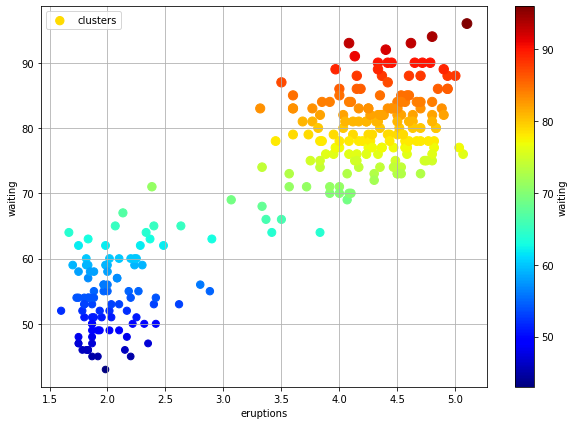

In [3]:
import matplotlib.pyplot as plt
df.plot(kind="scatter", x="eruptions", y="waiting", grid=True,
             s=df['waiting'], label="clusters", c='waiting',
             cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10, 7))
plt.show()

# Standardizing the Features

In [4]:
X = df[['eruptions', 'waiting']]

In [5]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

# K-Means Implementation

In [6]:
class KMeans:
    def __init__(self, k=2, max_iter=500):
        self.k = k
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = []
        # initialize centroids randomly
        for i in range(self.k):
            self.centroids.append(X[np.random.randint(0, len(X)-1)])
        for _ in range(self.max_iter):
            clusters = []
            for i in range(self.k):
                clusters.append([])
            for x in X:
                distances = [np.linalg.norm(x - c) for c in self.centroids]
                cluster_index = distances.index(min(distances))
                clusters[cluster_index].append(x)
            prev_centroids = self.centroids.copy()
            for i in range(self.k):
                if clusters[i]:
                    self.centroids[i] = np.mean(clusters[i], axis=0)
            if prev_centroids == self.centroids:
                break

    def predict(self, X):
        y_pred = []
        for x in X:
            distances = [np.linalg.norm(x - c) for c in self.centroids]
            cluster_index = distances.index(min(distances))
            y_pred.append(cluster_index)
        return y_pred

# Clustering the Observations

In [7]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=2, init='k-means++')
kmeans.fit(X)

C:\Users\raman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2)

In [8]:
kmeans.inertia_

79.57595948827702

# Finding the Optimal Number of Clusters

In [9]:
elbow = []
for i in range(2,11):
    kmeans = cluster.KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

C:\Users\raman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\raman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'Inertia')

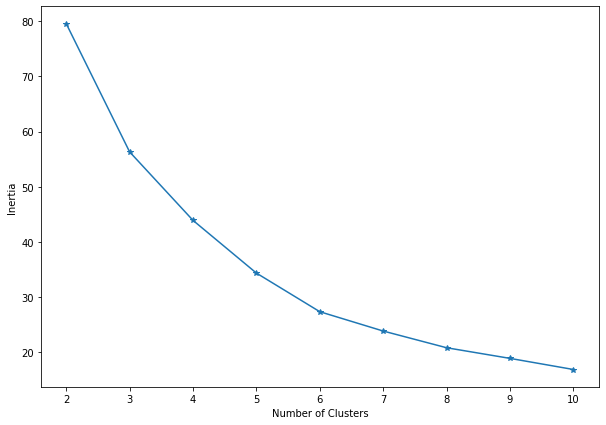

In [10]:
clustered_data = pd.DataFrame({'Cluster':range(2,11), 'SSE':elbow})
plt.figure(figsize=(10,7))
plt.plot(clustered_data['Cluster'], clustered_data['SSE'], marker="*")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

According to the figure, the optimal number of clusters is 6.

# Clustering the Observations in 6 Clusters

In [11]:
kmeans = cluster.KMeans(n_clusters=6, init='k-means++')
kmeans.fit(X)
pred = kmeans.predict(X)

C:\Users\raman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [12]:
clustered_data = pd.DataFrame(X)
clustered_data['cluster'] = pred
clustered_data.head(10)

,0,1,cluster
0,0.098499,0.597123,3
1,-1.481459,-1.245181,4
2,-0.135861,0.228663,2
3,-1.057503,-0.655644,1
4,0.917443,1.039277,5
5,-0.530851,-1.171489,1
6,1.064028,1.260353,5
7,0.098499,1.039277,3
8,-1.349795,-1.466258,4
9,0.756814,1.039277,5
